Lab01

Objective: <br>
Task 1: Logistic Regression using single feature <br>
Task 2: Logistic Regression using multiple features

Submitted by:<br>Apil Maraseni<br>  
ACE079BCT012



For doing this lab, we will follow the ML pipleine. <br>
1.Data Retrieval and Collection
2.Data Cleaning
3.Feature Design
4.Algorithm Selection
5.Loss Function Selection
6.Model Learning
7.Model Evaluation
8.Hyperparameter Tuning
9.Model Validation
10.Model Deployment

Task1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df['Heart Disease']=df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [7]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
X = df[["Age"]].values
y = df["Heart Disease"].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6222222222222222

Confusion Matrix:
 [[40 14]
 [20 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        54
           1       0.53      0.44      0.48        36

    accuracy                           0.62        90
   macro avg       0.60      0.59      0.59        90
weighted avg       0.61      0.62      0.61        90



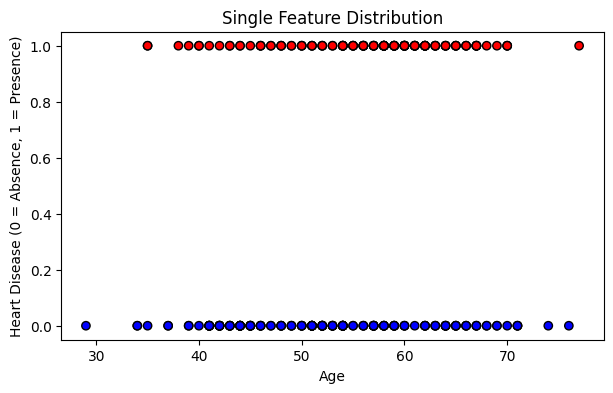

In [14]:
plt.figure(figsize=(7,4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.title("Single Feature Distribution")
plt.show()


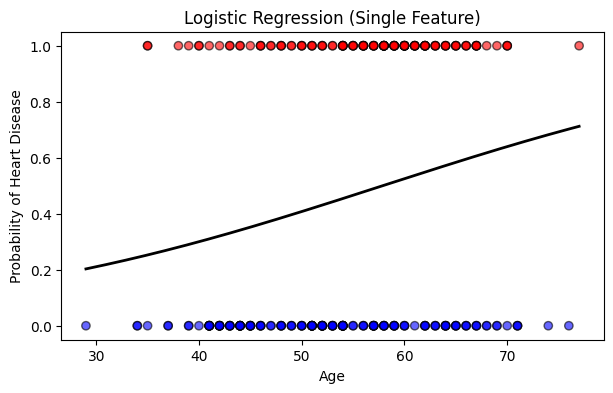

In [15]:
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
y_prob = model.predict_proba(X_range_scaled)[:, 1]
plt.figure(figsize=(7,4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', alpha=0.6)
plt.plot(X_range, y_prob, color='black', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Probability of Heart Disease")
plt.title("Logistic Regression (Single Feature)")
plt.show()

Task2

In [16]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [17]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [18]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [19]:
df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})

In [20]:
X = df.drop("Heart Disease", axis=1).values
y = df["Heart Disease"].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
base_model = LogisticRegression(solver="saga", random_state=42)

In [24]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.01, 0.1, 1, 5, 10, 20],
    "l1_ratio": [0.0, 0.5, 1.0],
    "max_iter": [500, 1000, 2000]
}

In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

In [26]:
print(grid)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 20],
                         'l1_ratio': [0.0, 0.5, 1.0],
                         'max_iter': [500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')


In [27]:
grid.fit(X_train, y_train)

d:\BCT 6th sem\Lab Works\AI\Lab01AI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...solver='saga')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'l1_ratio': [0.0, 0.5, ...], 'max_iter': [500, 1000, ...], 'penalty': ['l1', 'l2', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter cand

In [29]:
print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'C': 0.1, 'l1_ratio': 0.0, 'max_iter': 500, 'penalty': 'l2'}
Best CV Accuracy: 0.8277777777777778


In [30]:
best_model = grid.best_estimator_

In [31]:
y_pred = best_model.predict(X_test)

In [32]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8888888888888888

Confusion Matrix:
 [[43  7]
 [ 3 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90        50
           1       0.84      0.93      0.88        40

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



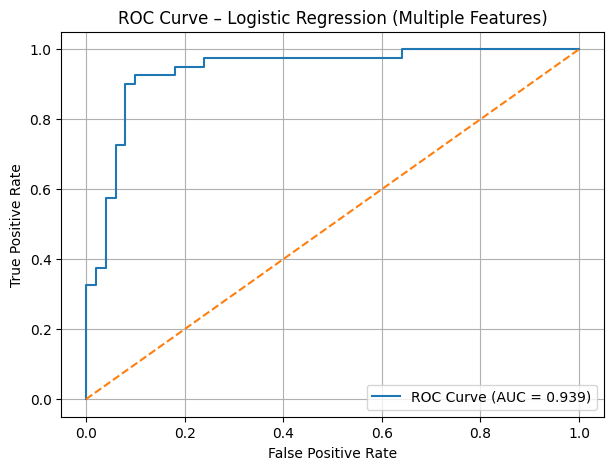

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Multiple Features)")
plt.legend()
plt.grid(True)
plt.show()


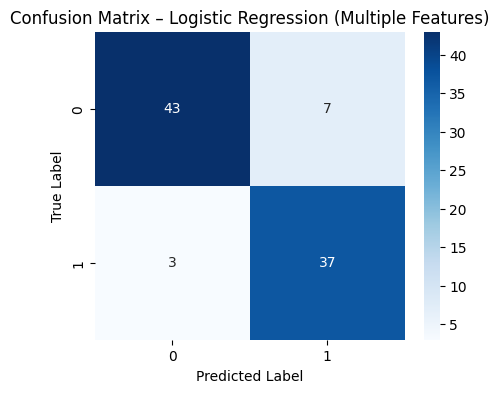

In [34]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression (Multiple Features)")
plt.show()

In [35]:
# Get feature names
feature_names = df.drop("Heart Disease", axis=1).columns

# Get coefficients
coefficients = best_model.coef_[0]

# Create DataFrame
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
11,Number of vessels fluro,0.651481
1,Sex,0.533783
2,Chest pain type,0.481689
12,Thallium,0.431356
8,Exercise angina,0.281466
9,ST depression,0.251040
10,Slope of ST,0.250653
3,BP,0.155202
4,Cholesterol,0.145982
6,EKG results,0.091567


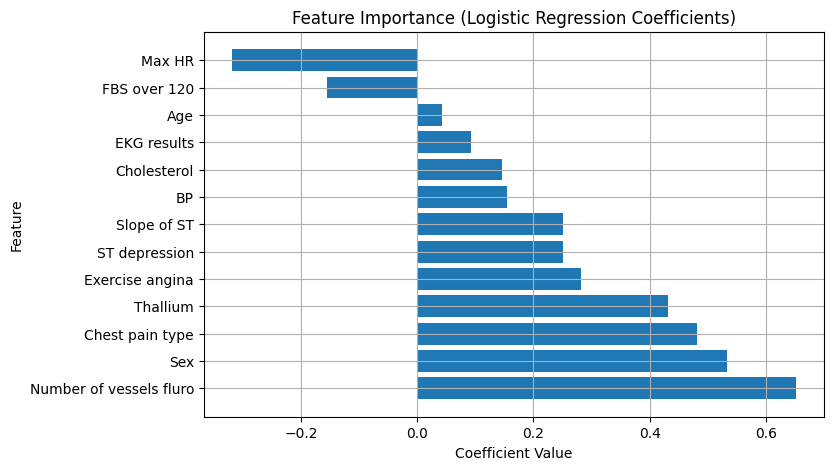

In [36]:
plt.figure(figsize=(8,5))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.grid(True)
plt.show()

## Purpose of Different Curves and Plots in Logistic Regression


Different curves and plots are used in Logistic Regression to understand both how the model learns and how well it performs as a classifier. These visualizations help explain probability estimation, decision boundaries, and overall evaluation across different thresholds.

The **sigmoid curve** shows how Logistic Regression converts a linear combination of input features into a probability value between 0 and 1. It also highlights the key difference between Logistic Regression and the perceptron, since Logistic Regression produces smooth probability outputs instead of a hard step decision.

The **decision boundary** represents the point where the predicted probability crosses the classification threshold (commonly 0.5). This helps visualize how the model separates the two classes based on the learned parameters.

The **ROC curve** evaluates model performance across all possible probability thresholds by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR). It gives a complete picture of the classifier’s behavior instead of relying on one fixed threshold.

The **AUC (Area Under the Curve)** provides a single numerical value that summarizes the model’s ability to distinguish between classes. A higher AUC indicates better discrimination performance, independent of the chosen threshold.

The **confusion matrix** shows the number of correct and incorrect predictions in terms of True Positives, True Negatives, False Positives, and False Negatives. It helps analyze what type of errors the model is making and where improvements are needed.

Finally, the **feature coefficient plot** helps interpret the model by showing how each feature contributes to the prediction. Positive coefficients increase the probability of the positive class, while negative coefficients reduce it, making Logistic Regression useful for both prediction and interpretability.

Overall, these plots collectively help in understanding the model’s learning behavior, interpretability, and classification performance at different stages of the machine learning workflow.




## Discussion and Conclusion

In this lab, we explored the machine learning pipeline and applied it to a heart disease dataset. The assignment consisted of two tasks: training a Logistic Regression model using a single feature and training it again using multiple features.

In **Task 1**, the model was trained using only one feature, making it conceptually similar to a single-input perceptron. The learning behavior was visualized using the **sigmoid curve**, which showed how the linear output is converted into a probability value. However, since only one feature was used, the model had limited information for classification. This resulted in overlapping class regions and reduced predictive ability, highlighting the limitations of single-feature learning and the need for richer feature representation.

In **Task 2**, multiple features were used to train the model, producing a higher-dimensional decision boundary that cannot be directly visualized. Therefore, model performance was assessed using **ROC curves**, **confusion matrices**, and other classification metrics. Additionally, hyperparameter tuning was performed using **GridSearchCV**, which improved model generalization by selecting the most suitable regularization settings. The tuned parameters included:

- **penalty** – type of regularization (l1, l2, elasticnet)
- **C** – inverse of regularization strength
- **l1_ratio** – mixing ratio for elastic net regularization
- **max_iter** – maximum iterations for model convergence

Furthermore, **feature coefficient analysis** helped interpret how each feature influenced heart disease prediction, demonstrating one of the key strengths of Logistic Regression: interpretability.

In conclusion, comparing single-feature and multi-feature models shows that increasing the number of features significantly improves the model’s performance and reliability.
